# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import re
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
if response.status_code == 200: #request was successful
    with open('image-predictions.tsv','wb') as file:
        file.write(response.content)
    print('File download succesfully.')
else: #request has failed
    print(f'File download failed. Status code: {response.status_code}')

File download succesfully.


In [4]:
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Following alternate Twitter method that is provided in the instructions


# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_archive.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


In [6]:
df_json = pd.read_json('tweet-json.txt', lines=True)


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## Visual Assessment of Data

In [7]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


Dog stages are spread across multiple columns. 'source' contains HTML tags.

In [8]:
df_predictions.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Dog names listed in 'p1','p2', and 'p3' are inconsistent as some breeds start uppercase and others are all lower. Furthermore, the names utilize underscores instead of spaces.

In [9]:
df_json.head()



,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


'source' again contains HTML tags. Retweet status may be able to determine which tweets can be dropped.

## Programmatic Assessment

In [10]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

The 'retweeted_status' columns contain 181 non-null values which need to be removed from our data. 'expanded_urls' has missing values which may mean the tweet contains no images. 'timestamp' is stored as a string(object) instead of datetime. Some dog names are 'None' or all lowercase and not a name. 'tweet_id' is stored as an int instead of a string as mathematical operations are unlikely to be necessary.

In [11]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


This frame has 2075 entries which means not all tweets have predictions. Again, 'tweet_id' is stored as an int instead of a string as mathematical operations are unlikely to be necessary.

In [12]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

Some of the useful columns appear to be 'retweet_count', 'favorite_count', 'id', as these are generally useful metrics and 'id' to cross-reference our other frames. Additionally, 'retweeted_status' shows that 179 entries in the data are retweets and can be removed. Once again, 'id' is stored as an int instead of a string as mathematical operations are unlikely to be necessary.

### Quality issues

1. The 'timestamp' in df_archive is not stored in the datetime format.

2. Dog breeds in df_predictions are inconsistent in their format, as some do not start with uppercase letters.

3. Underscores are used instead of spaces for dog breeds in df_predictions.

4. Names of some dogs are incorrect - all lowercase or 'None'.

5. 'source' contains HTML tags.

6. Replies and retweets are in the dataframes.

7. Some tweets don't have images.

8. 'tweet_id' and 'id' are not stored as strings.

### Tidiness issues

1. Dog categories in df_archive are in separate columns for each value.

2. All datasets can be merged into one based off the tweet id.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [13]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_predictions_clean = df_predictions.copy()
df_json_clean = df_json.copy()

### Issue #1: 
The 'timestamp' in df_archive is not stored in the datetime format.

#### Define: 
In 'df_archive', convert 'timestamp' from a string to datetime format.

#### Code

In [14]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

#### Test

In [15]:
#Check data type of column
df_archive_clean['timestamp'].dtype

datetime64[ns, UTC]

### Issue #2:

Dog breeds in df_predictions are inconsistent in their format, as some do not start with uppercase letters.

#### Define
Capitalize the first letter of dog breed in 'p1', 'p2', and 'p3'.

#### Code

In [16]:
df_predictions_clean['p1'] = df_predictions_clean['p1'].str.capitalize()
df_predictions_clean['p2'] = df_predictions_clean['p2'].str.capitalize()
df_predictions_clean['p3'] = df_predictions_clean['p3'].str.capitalize()

#### Test

In [17]:
df_predictions_clean[['p1','p2','p3']].head()

,p1,p2,p3
0,Welsh_springer_spaniel,Collie,Shetland_sheepdog
1,Redbone,Miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,Malinois,Bloodhound
3,Rhodesian_ridgeback,Redbone,Miniature_pinscher
4,Miniature_pinscher,Rottweiler,Doberman


### Issue #3:

 Underscores are used instead of spaces for dog breeds in df_predictions.

#### Define

Replace underscores in'p1', 'p2', and 'p3' for dog breed.

#### Code

In [18]:
df_predictions_clean['p1'] = df_predictions_clean['p1'].str.replace('_',' ')
df_predictions_clean['p2'] = df_predictions_clean['p2'].str.replace('_',' ')
df_predictions_clean['p3'] = df_predictions_clean['p3'].str.replace('_',' ')

#### Test

In [19]:
df_predictions_clean[['p1','p2','p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,Collie,Shetland sheepdog
1,Redbone,Miniature pinscher,Rhodesian ridgeback
2,German shepherd,Malinois,Bloodhound
3,Rhodesian ridgeback,Redbone,Miniature pinscher
4,Miniature pinscher,Rottweiler,Doberman


### Issue #4: 
Names of some dogs are incorrect - all lowercase or 'None'.

#### Define: 

Find and replace invalid dog names (None or lowercase which may not be names) with NaN. 

#### Code

In [20]:
mask_dog_names = df_archive_clean['name'].str.islower() | (df_archive_clean['name'] == 'None')
df_archive_clean.loc[mask_dog_names, 'name'] = np.nan

#### Test

In [21]:
incorrect_names = df_archive_clean[mask_dog_names]['name'].unique()
incorrect_names

array([nan], dtype=object)

### Issue #5: 

'source' contains HTML tags.

#### Define: 

Extract actual source from HTML tags for df_archive and df_json using regular expression.

#### Code

In [22]:

df_archive_clean['source'] = df_archive_clean['source'].apply(lambda x: re.findall(r'>(.+)<', x)[0])
df_json_clean['source'] = df_json_clean['source'].apply(lambda x: re.findall(r'>(.+)<', x)[0])

#### Test

In [23]:
df_archive_clean['source'].unique(),df_json_clean['source'].unique()

(array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
        'TweetDeck'], dtype=object),
 array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
        'TweetDeck'], dtype=object))

### Issue #6: 

Replies and retweets are in the dataframes.

#### Define: 

Remove tweets that are retweets or replies in df_archive.

#### Code

In [24]:
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isna()]
df_archive_clean = df_archive_clean[df_archive_clean['in_reply_to_status_id'].isna()]

#### Test

In [25]:
df_archive_clean[['retweeted_status_id','in_reply_to_status_id']].notna().sum()

retweeted_status_id      0
in_reply_to_status_id    0
dtype: int64

### Issue #7: 

Some tweets don't have images.

#### Define: 

Remove tweets that don't have image predictions from df_archive using df_predictions.

#### Code

In [26]:
#extract tweet ids
tweets_with_predictions = df_predictions_clean['tweet_id'].unique()

#remove tweets with no predictions
df_archive_clean = df_archive_clean[df_archive_clean['tweet_id'].isin(tweets_with_predictions)]

#### Test

In [27]:
#check if any tweets without predictions remain
sum(~df_archive_clean['tweet_id'].isin(df_predictions_clean['tweet_id']))

0

### Issue #8: 

'tweet_id' and 'id' are not stored as strings.

#### Define: 

Convert 'tweet_id' and 'id' to strings.

#### Code

In [28]:
#change data type to string
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_predictions_clean['tweet_id'] = df_predictions_clean['tweet_id'].astype(str)
df_json_clean['id'] = df_json_clean['id'].astype(str)

#### Test

In [29]:
#confirm data type
df_archive_clean['tweet_id'].info(),df_predictions_clean['tweet_id'].info(),df_json_clean['id'].info()

<class 'pandas.core.series.Series'>
Index: 1971 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
1971 non-null   object
dtypes: object(1)
memory usage: 30.8+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 2354 entries, 0 to 2353
Series name: id
Non-Null Count  Dtype 
--------------  ----- 
2354 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


(None, None, None)

### Tidy Issue #1: 

Dog categories in df_archive are in separate columns for each value.

#### Define: 

Melt dog stages into one column named 'dog_stage'. Merge duplicate rows for multiple stages listed in tweet.


#### Code

In [30]:
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']

#Melt frame
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']
melted_dog_stages = pd.melt(df_archive_clean, id_vars=['tweet_id'], value_vars=dog_stages, value_name='dog_stage')

#drop None in dog_stage
melted_dog_stages = melted_dog_stages[melted_dog_stages['dog_stage'] != 'None']

#convert NaN to empty strings before join
melted_dog_stages['dog_stage'] = melted_dog_stages['dog_stage'].fillna('')

#join multiple dog stages
melted_dog_stages = melted_dog_stages.groupby('tweet_id')['dog_stage'].apply(lambda x: ', '.join(filter(None, x))).reset_index()

#merge melted into df_archive_clean
df_archive_clean = pd.merge(df_archive_clean, melted_dog_stages, on='tweet_id', how='left')
df_archive_clean.drop(columns=dog_stages, inplace=True)



#### Test

In [31]:
print(df_archive_clean['dog_stage'].value_counts())
df_archive_clean[df_archive_clean['dog_stage'].notna()].head()

dog_stage
                  1668
pupper             201
doggo               63
puppo               22
doggo, pupper        8
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: count, dtype: int64


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


### Tidy Issue #2: 

All datasets can be merged into one based off the tweet id.

#### Define: 

Merge df_archive, df_predictions, and df_json into a single master dataframe from 'tweet_id'

#### Code

In [32]:
#rename id to tweet_id in df_json for consistency
df_json_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#merge dataframes
df_master = pd.merge(df_archive_clean, df_predictions_clean, on='tweet_id', how='inner')
df_master = pd.merge(df_master, df_json_clean, on='tweet_id', how='inner')

#### Test

In [33]:
df_master.head(),df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1971 non-null   object             
 1   in_reply_to_status_id_x        0 non-null      float64            
 2   in_reply_to_user_id_x          0 non-null      float64            
 3   timestamp                      1971 non-null   datetime64[ns, UTC]
 4   source_x                       1971 non-null   object             
 5   text                           1971 non-null   object             
 6   retweeted_status_id            0 non-null      float64            
 7   retweeted_status_user_id       0 non-null      float64            
 8   retweeted_status_timestamp     0 non-null      object             
 9   expanded_urls                  1971 non-null   object             
 10  rating_numerator        

(             tweet_id  in_reply_to_status_id_x  in_reply_to_user_id_x  \
 0  892420643555336193                      NaN                    NaN   
 1  892177421306343426                      NaN                    NaN   
 2  891815181378084864                      NaN                    NaN   
 3  891689557279858688                      NaN                    NaN   
 4  891327558926688256                      NaN                    NaN   
 
                   timestamp            source_x  \
 0 2017-08-01 16:23:56+00:00  Twitter for iPhone   
 1 2017-08-01 00:17:27+00:00  Twitter for iPhone   
 2 2017-07-31 00:18:03+00:00  Twitter for iPhone   
 3 2017-07-30 15:58:51+00:00  Twitter for iPhone   
 4 2017-07-29 16:00:24+00:00  Twitter for iPhone   
 
                                                 text  retweeted_status_id  \
 0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
 1  This is Tilly. She's just checking pup on you....                  NaN   
 2  Th

## Storing Data

In [34]:
df_master.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data

In [35]:
df_master.describe()

,in_reply_to_status_id_x,in_reply_to_user_id_x,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,...,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,0.0,0.0,0.0,0.0,1971.000000,1971.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03,...,0.0,0.0,0.0,0.0,1971.000000,1971.000000,1971.0,1971.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,12.223237,10.477423,1.201928,0.594558,1.345850e-01,6.016556e-02,...,NaN,NaN,NaN,NaN,2784.449518,8949.106545,0.0,0.0,NaN,NaN
std,NaN,NaN,NaN,NaN,41.634034,6.853275,0.559020,0.272126,1.010527e-01,5.094156e-02,...,NaN,NaN,NaN,NaN,4697.662893,12267.799790,0.0,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,...,NaN,NaN,NaN,NaN,16.000000,81.000000,0.0,0.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,10.000000,10.000000,1.000000,0.363091,5.339800e-02,1.608055e-02,...,NaN,NaN,NaN,NaN,628.500000,1997.000000,0.0,0.0,NaN,NaN
50%,NaN,NaN,NaN,NaN,11.000000,10.000000,1.000000,0.587764,1.173970e-01,4.944380e-02,...,NaN,NaN,NaN,NaN,1367.000000,4147.000000,0.0,0.0,NaN,NaN
75%,NaN,NaN,NaN,NaN,12.000000,10.000000,1.000000,0.847827,1.955655e-01,9.153815e-02,...,NaN,NaN,NaN,NaN,3239.000000,11402.500000,0.0,0.0,NaN,NaN
max,NaN,NaN,NaN,NaN,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,...,NaN,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,NaN,NaN


Based on the data above, 'retweet_count' and 'favorite_count' are related positively. Let's confirm by finding the strength of the correlation and view a scatterplot of the data.

0.9130143486107434


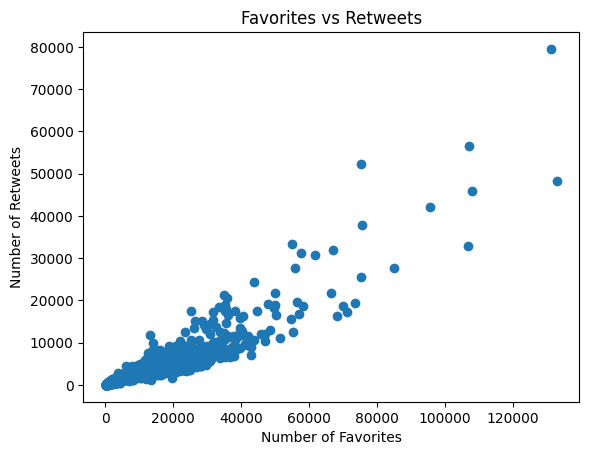

In [36]:
correlation = df_master['favorite_count'].corr(df_master['retweet_count'])
print(correlation)

plt.scatter(df_master['favorite_count'],df_master['retweet_count'])
plt.title('Favorites vs Retweets')
plt.xlabel('Number of Favorites')
plt.ylabel('Number of Retweets')
plt.show()

Favorites and Retweets do appear to have a positive relation. Let's see if certain breeds or the tone of the tweets perform better than others. We'll start with the dog breeds.

In [37]:
#use only first most confident predictions that are actually dogs
breed_predictions = df_master.query('p1_dog')[['tweet_id','p1','favorite_count','retweet_count']]

#rename for clarity
breed_predictions.rename(columns={'p1':'predicted_breed'},inplace=True)

#Group by breed, aggregate favorites and retweets, and sort by favorites
breed_performance = breed_predictions.groupby('predicted_breed').agg({
    'favorite_count':'mean',
    'retweet_count':'mean'
}).sort_values(by='favorite_count', ascending=False)


print(breed_performance.head(10))

breed_correlation = breed_performance['favorite_count'].corr(breed_performance['retweet_count'])
print(breed_correlation)

                         favorite_count  retweet_count
predicted_breed                                       
Saluki                     24060.000000    5133.750000
French bulldog             17913.000000    4683.923077
Afghan hound               17326.666667    5976.000000
Giant schnauzer            17314.500000    5161.500000
Black-and-tan coonhound    17012.000000    4164.500000
Flat-coated retriever      16791.625000    4520.250000
Irish water spaniel        16400.000000    4500.666667
Standard poodle            15786.000000    6631.857143
English springer           15657.222222    5973.555556
Cardigan                   15311.000000    4540.588235
0.9276242979293391


The number one breed based on favorites appears to be the Saluki, for the breeds that were able to be predicted. We can also see we retained a strong positive correlation in our filtered dataframe. Now lets move on to the tone of the tweets. 

In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

#analyze tweet text and keep compound score
df_master['sentiment'] = df_master['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

#categorize sentiment scores based on typical threshold
df_master['sentiment_label'] = pd.cut(df_master['sentiment'], bins=[-1,-0.5,0.5,1], labels=['negative', 'neutral', 'positive'])

#analyze performance of different sentiments
sentiment_performance = df_master.groupby('sentiment_label').agg({
    'favorite_count':'mean',
    'retweet_count':'mean'
})

print(sentiment_performance)

                 favorite_count  retweet_count
sentiment_label                               
negative            6935.803371    2236.376404
neutral             8596.697521    2681.644628
positive           10295.217839    3165.154374


/tmp/ipykernel_30141/2865355914.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_performance = df_master.groupby('sentiment_label').agg({


We can see that tweets with a positive sentiment perform the highest in favorites and retweets, with neutral and negative following, respectively.

### Insights:
1. The number of retweets and favorites are positively related to each other.

2. Based on this data set, Saluki was the highest favorited dog and certain breeds are associated with a higher favorite and retweet count.

3. Tweets that were positive had the highest favorites and retweets. Meanwhile, negative tweets had the lowest.